In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.io import arff
import matplotlib.pyplot as plt

# MAKING TRAIN/TEST/VAL SPLIT
**EXAMPLE WITH COVTYPE DATASET**
1. Read in dataset
1. Remove Nan's
2. Label Encode non-numerical features
3. Split
4. Save datasets

In [8]:
#reading in dataset
df = arff.loadarff('../../datasets/year/php9CNzHz.arff')

df = pd.DataFrame(df[0])
df
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

targets = [
    'year'
]

# This is going to be a regression task, Year will not undergo any linear transformation

#There are 515345 samples and 90 features. I will reduce the number of samples because the training times for saint are ridiculous
drop_indices = np.random.choice(df.index, 515345-375000, replace=False)
df = df.drop(drop_indices)

df_train, df_temp = train_test_split(df, train_size=.7, random_state=12)
df_val, df_test = train_test_split(df_temp, train_size=.5, random_state=12)

print(df_train.shape[0])
print(df_val.shape[0])
print(df_test.shape[0])

262500
56250
56250


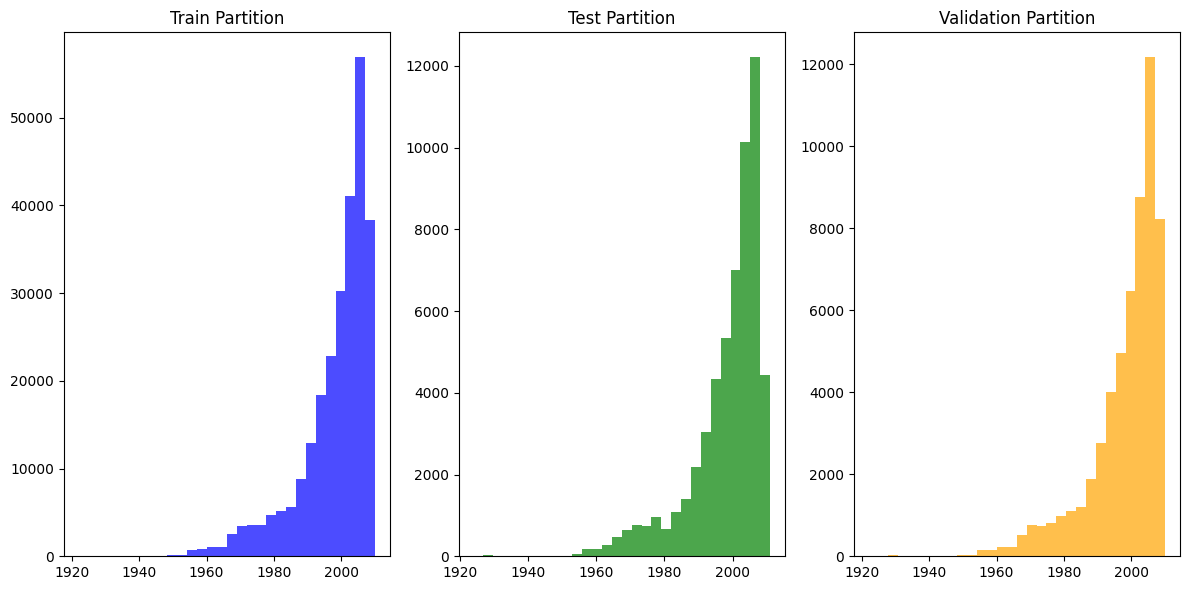

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df_train[targets], bins=30, color='blue', alpha=0.7)
plt.title('Train Partition')

plt.subplot(1, 3, 2)
plt.hist(df_test[targets], bins=30, color='green', alpha=0.7)
plt.title('Test Partition')

plt.subplot(1, 3, 3)
plt.hist(df_val[targets], bins=30, color='orange', alpha=0.7)
plt.title('Validation Partition')

plt.tight_layout()
plt.show()

In [10]:
#save csvs in a dataset folder in your directory
# df_train.to_csv(r'C:\Users\smbm2\projects\CAT-Transformer\datasets\year\train.csv', index=False)
# df_val.to_csv(r'C:\Users\smbm2\projects\CAT-Transformer\datasets\year\validation.csv', index=False)
# df_test.to_csv(r'C:\Users\smbm2\projects\CAT-Transformer\datasets\year\test.csv', index=False)

df_train.to_csv('../../datasets/year/train.csv', index=False)
df_val.to_csv('../../datasets/year/validation.csv', index=False)
df_test.to_csv('../../datasets/year/test.csv', index=False)